Cleaned Heart Disease Dataset Preview:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  result  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
Decision Tree (Gini) Accuracy: 0.48


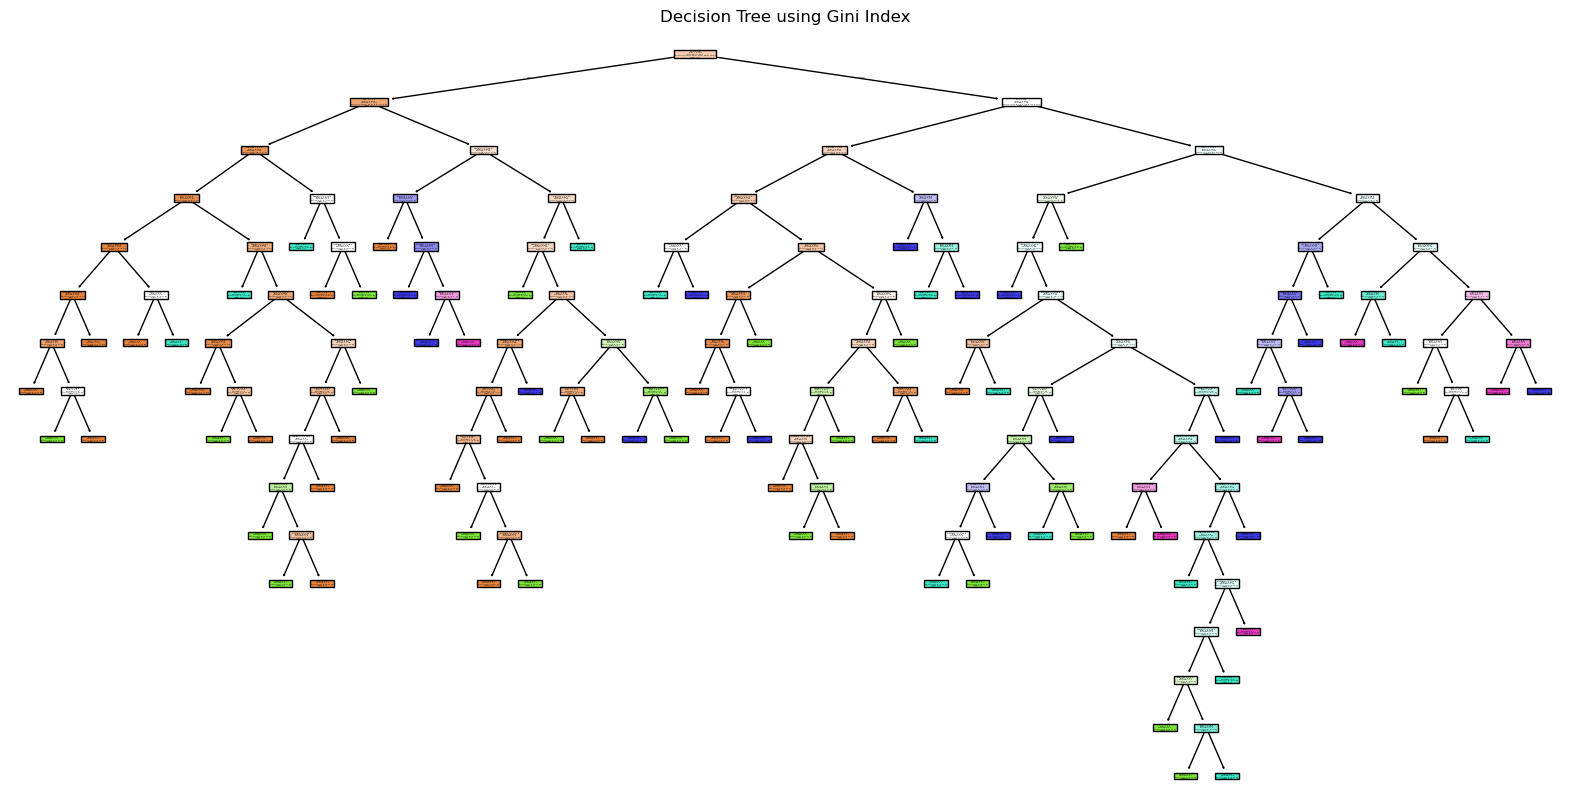

Decision Tree (Gini, Max Depth=3) Accuracy: 0.63


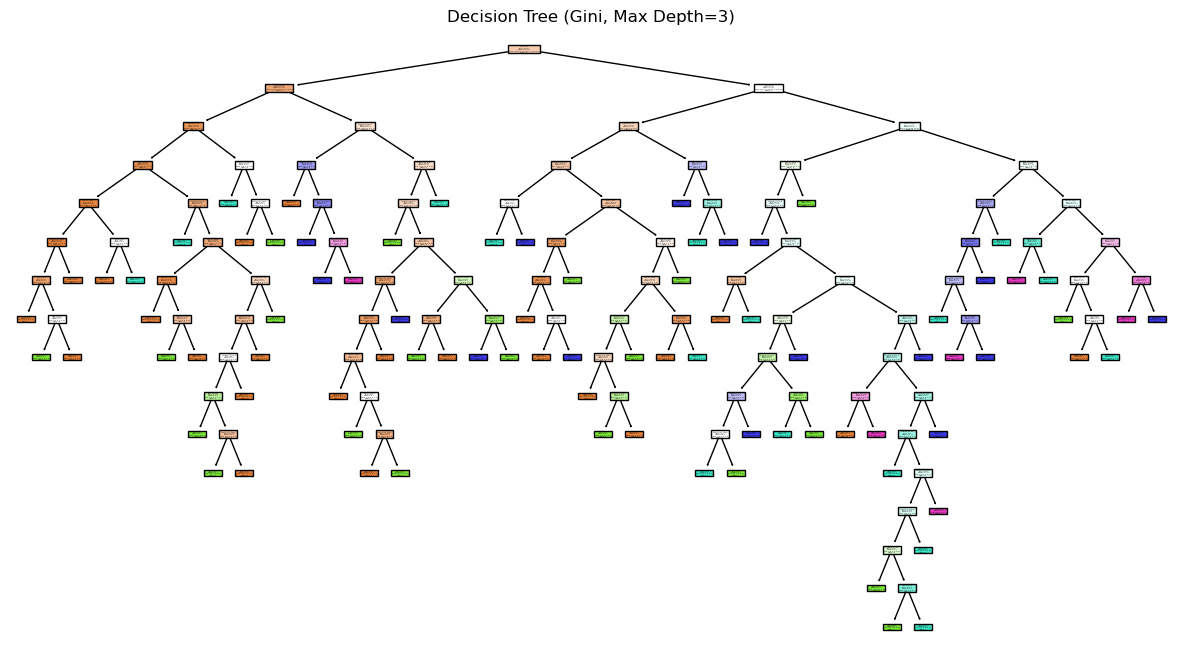

Decision Tree (Entropy) Accuracy: 0.53


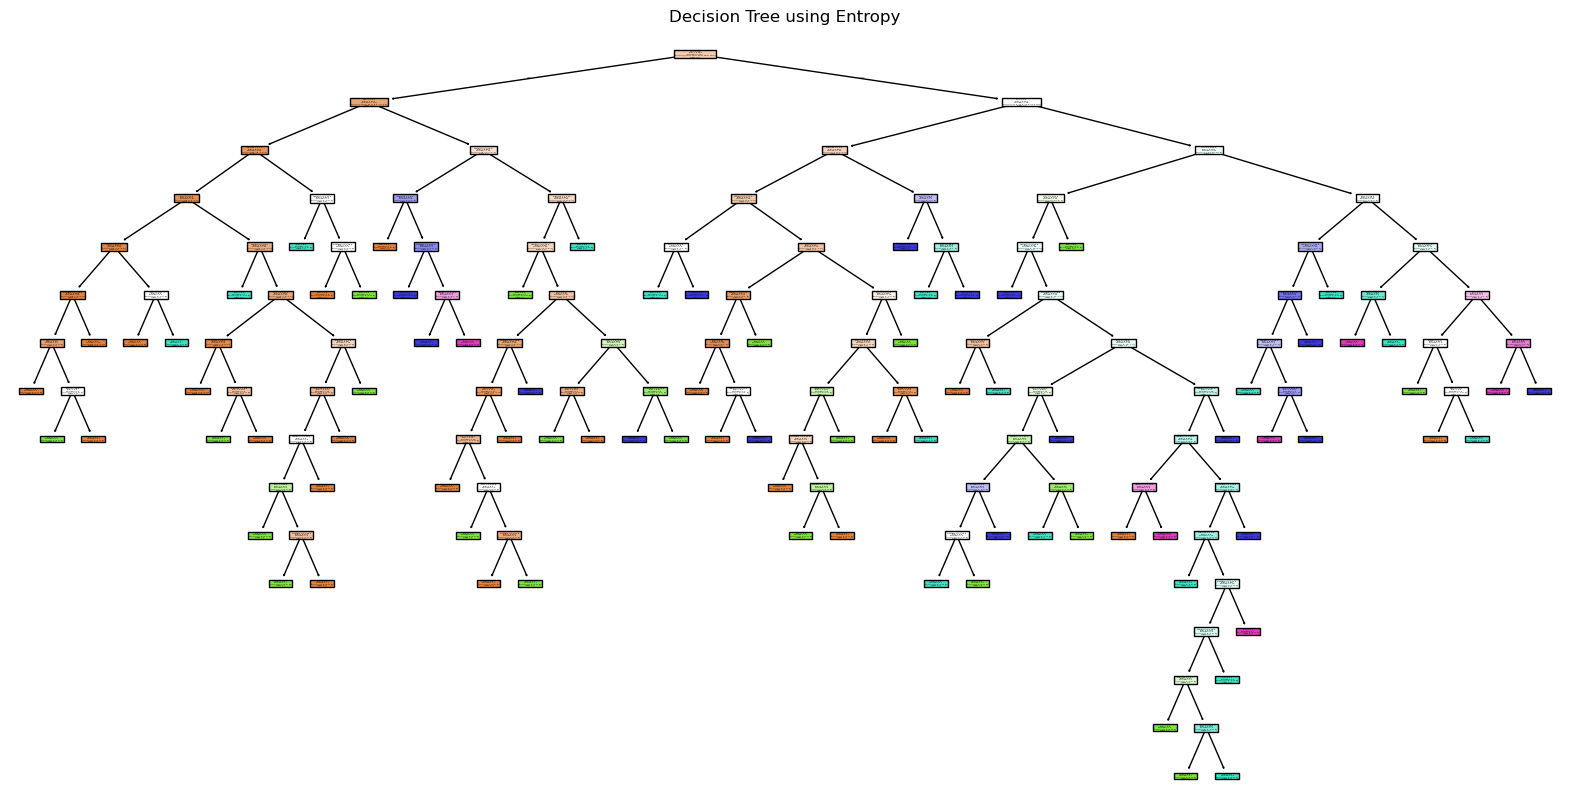


Comparison of Decision Tree Models:
1. Gini Index Accuracy: 0.48
2. Gini (Max Depth=3) Accuracy: 0.63
3. Entropy Accuracy: 0.53


In [ ]:
!pip install graphviz pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import zipfile

zip_file_path = r"C:\Users\makif\Desktop\lab08-521\heart+disease.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\makif\Desktop\lab08-521\heart_disease")

data_path = r"C:\Users\makif\Desktop\lab08-521\heart_disease\processed.cleveland.data"

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'
]

heart_data = pd.read_csv(data_path, header=None, names=columns)

# Convert '?' to NaN and drop missing values
heart_data.replace('?', np.nan, inplace=True)
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')
heart_data.dropna(inplace=True)

print("Cleaned Heart Disease Dataset Preview:")
print(heart_data.head())

features = heart_data.iloc[:, :-1]  
target = heart_data['result']  

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(features_train, target_train)
pred_gini = dt_gini.predict(features_test)

accuracy_gini = accuracy_score(target_test, pred_gini)
print(f"Decision Tree (Gini) Accuracy: {accuracy_gini:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=features.columns, class_names=[str(cls) for cls in dt_gini.classes_], filled=True)
plt.title("Decision Tree using Gini Index")
plt.show()

dt_depth3 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_depth3.fit(features_train, target_train)
pred_depth3 = dt_depth3.predict(features_test)

accuracy_depth3 = accuracy_score(target_test, pred_depth3)
print(f"Decision Tree (Gini, Max Depth=3) Accuracy: {accuracy_depth3:.2f}")

plt.figure(figsize=(15, 8))
plot_tree(dt_gini, feature_names=features.columns, class_names=[str(cls) for cls in dt_gini.classes_], filled=True)
plt.title("Decision Tree (Gini, Max Depth=3)")
plt.show()

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(features_train, target_train)
pred_entropy = dt_entropy.predict(features_test)

accuracy_entropy = accuracy_score(target_test, pred_entropy)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_entropy:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=features.columns, class_names=[str(cls) for cls in dt_gini.classes_], filled=True)
plt.title("Decision Tree using Entropy")
plt.show()

print("\nComparison of Decision Tree Models:")
print(f"1. Gini Index Accuracy: {accuracy_gini:.2f}")
print(f"2. Gini (Max Depth=3) Accuracy: {accuracy_depth3:.2f}")
print(f"3. Entropy Accuracy: {accuracy_entropy:.2f}")

